In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union, List, Dict
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv(r"C:\Users\user\Desktop\python10\week 1 data\raw_analyst_ratings.csv\raw_analyst_ratings.csv")


Descriptive Statictics 


In [ ]:
df['headline_length'] = df['headline'].astype(str).apply(len)

length_stats = df['headline_length'].describe()
print("📊 Headline Length Statistics:\n")
print(length_stats)


📊 Headline Length Statistics:

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


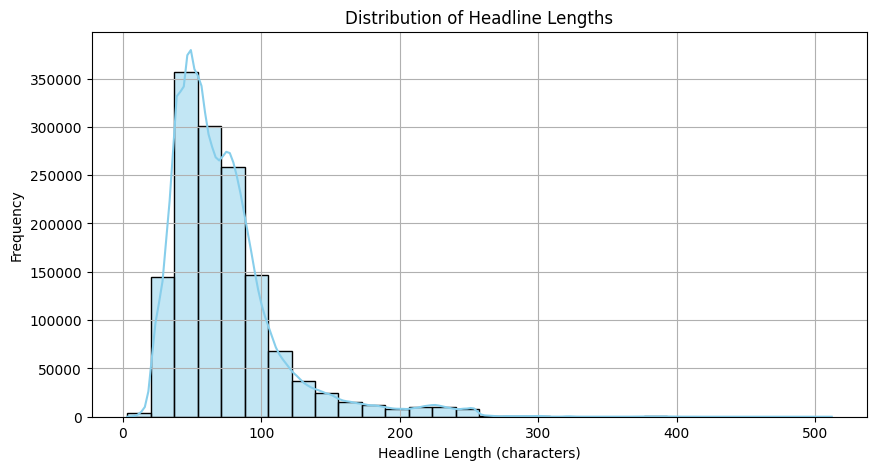

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [7]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

print("📚 Top Publishers by Number of Articles:\n")
print(publisher_counts)


📚 Top Publishers by Number of Articles:

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


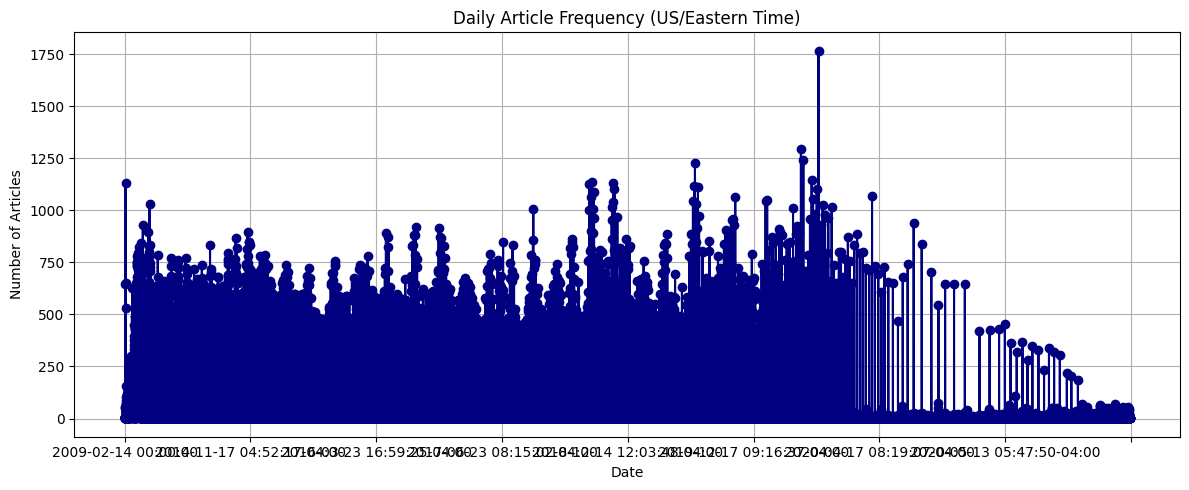

In [ ]:
daily_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
daily_counts.plot(marker='o', color='navy')
plt.title('Daily Article Frequency (US/Eastern Time)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\1531737490.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['publish_month'] = df['date'].dt.to_period('M')
C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\1531737490.py:12: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rahwa.B\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


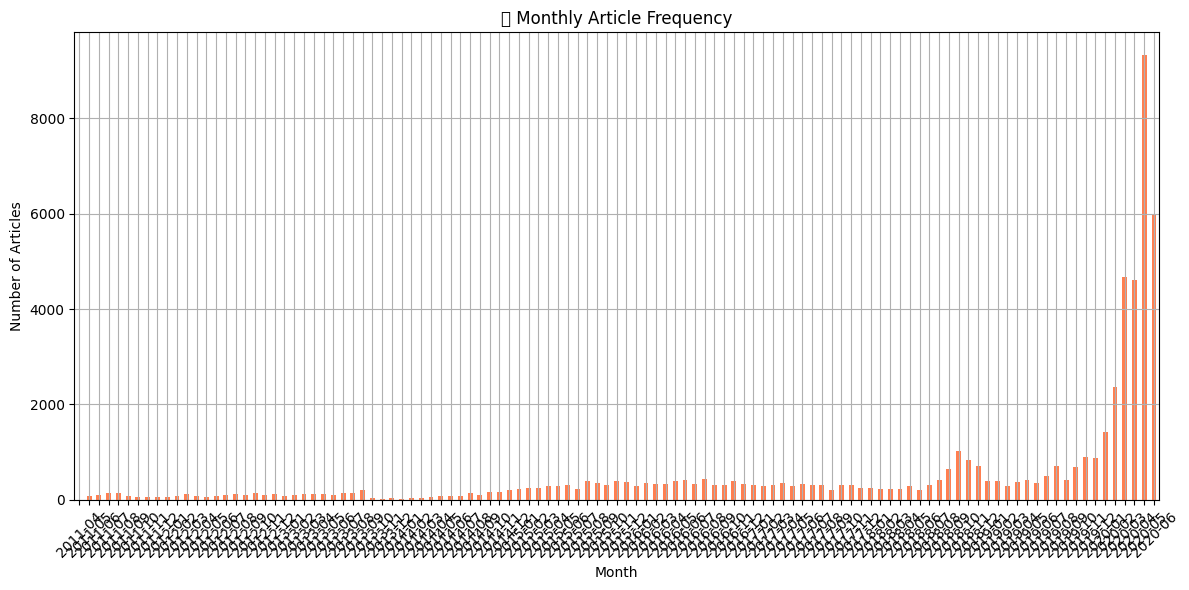

In [4]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['publish_month'] = df['date'].dt.to_period('M')

monthly_counts = df['publish_month'].value_counts().sort_index()

monthly_counts.plot(kind='bar', figsize=(12,6), color='coral')
plt.title('📆 Monthly Article Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Text Analysis(Topic Modeling)

In [3]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)  
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return ' '.join(tokens)

df['clean_headline'] = df['headline'].astype(str).apply(clean_text)


vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['clean_headline'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(dtm)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n🧠 Topic #{topic_idx+1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)


🧠 Topic #1:
shares, says, announces, reports, share, new, analyst, deal, ceo, update

🧠 Topic #2:
est, eps, reports, sales, estimate, initiates, sees, coverage, announces, yesterday

🧠 Topic #3:
market, stocks, week, update, earnings, markets, hit, industry, highs, stock

🧠 Topic #4:
shares, price, trading, buy, maintains, target, raises, downgrades, companies, lowers

🧠 Topic #5:
stocks, benzingas, earnings, session, moving, premarket, scheduled, watch, etfs, upgrades


Time Series Analysis

C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\3995891741.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rahwa.B\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


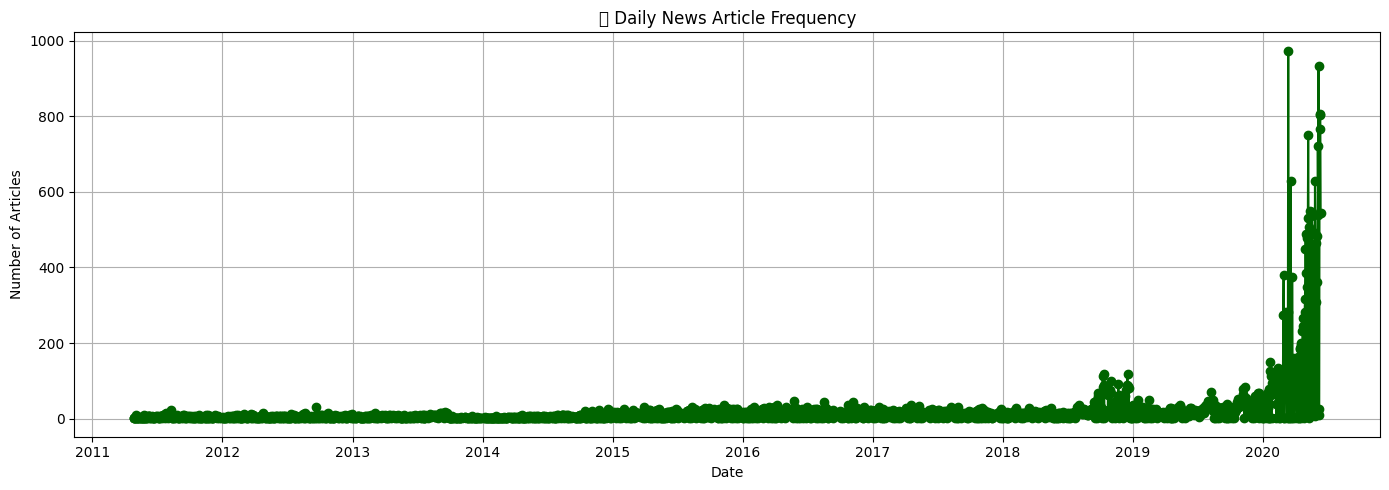

In [9]:
df['publish_day'] = df['date'].dt.date  
daily_counts = df.groupby('publish_day').size()

plt.figure(figsize=(14, 5))
daily_counts.plot(marker='o', color='darkgreen')
plt.title('📈 Daily News Article Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
rolling_mean = daily_counts.rolling(window=7, center=True).mean()
spikes = daily_counts[daily_counts > rolling_mean * 2]

print("🔺 High-activity days:\n", spikes)


🔺 High-activity days:
 publish_day
2011-05-02      9
2011-05-25      9
2011-05-31      7
2011-07-27     14
2011-08-11     23
             ... 
2020-03-06    281
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-05-26    628
Length: 102, dtype: int64


C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\2909027454.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publish_hour', data=df, palette='viridis')
C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\2909027454.py:10: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rahwa.B\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


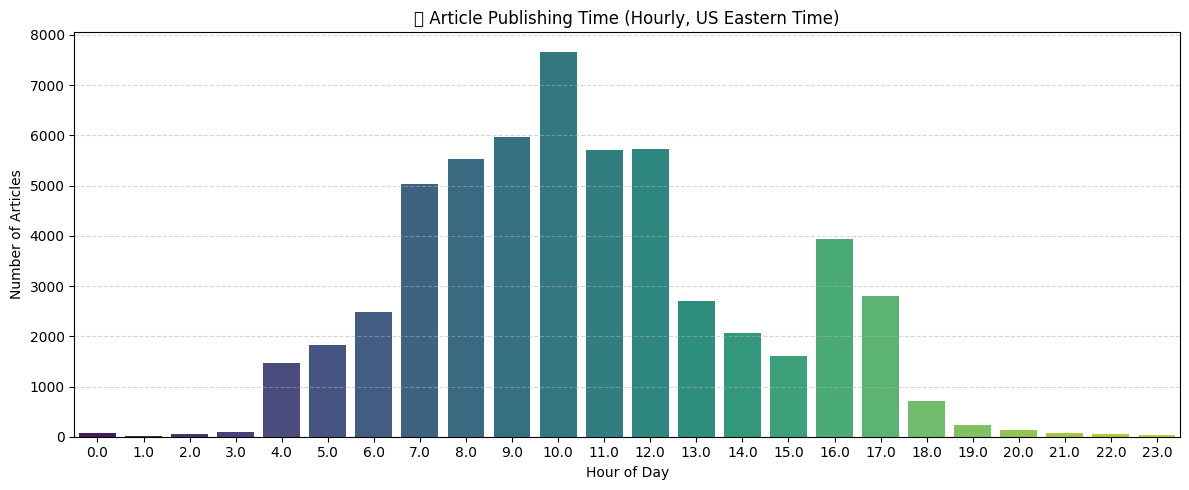

In [12]:
df['publish_hour'] = df['date'].dt.hour  

plt.figure(figsize=(12, 5))
sns.countplot(x='publish_hour', data=df, palette='viridis')
plt.title("🕒 Article Publishing Time (Hourly, US Eastern Time)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Articles")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Publisher Analysis

C:\Users\Rahwa.B\AppData\Local\Temp\ipykernel_12596\3270787514.py:10: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rahwa.B\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


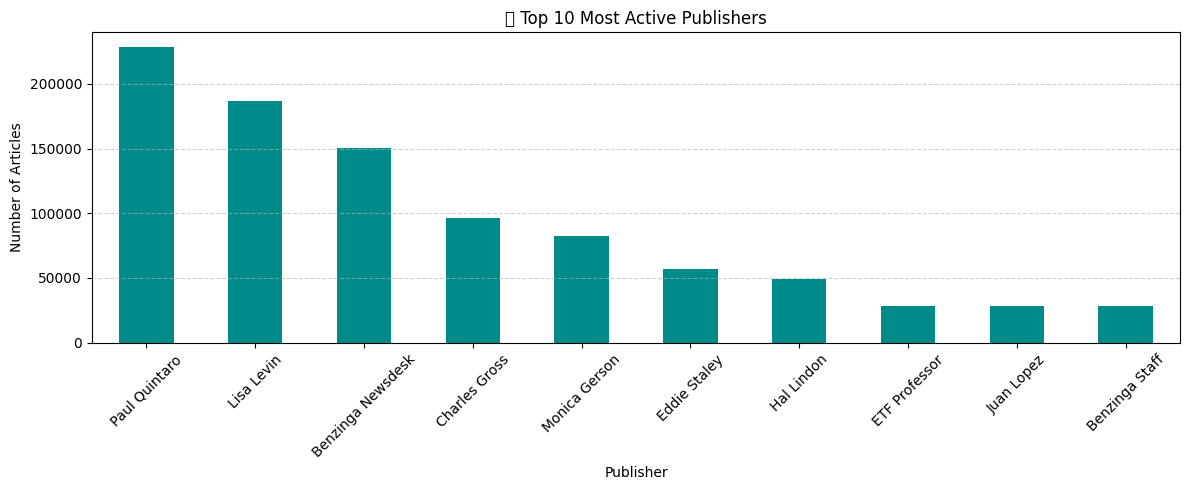

In [ ]:
publisher_counts = df['publisher'].value_counts()

plt.figure(figsize=(12, 5))
publisher_counts.head(10).plot(kind='bar', color='darkcyan')
plt.title("🏆 Top 10 Most Active Publishers")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [7]:
import re

# Function to extract domain from an email-like string
def extract_domain(publisher):
    match = re.search(r'@([\w\.-]+)', str(publisher))
    return match.group(1).lower() if match else None

# Apply extraction
df['email_domain'] = df['publisher'].apply(extract_domain)
domain_counts = df['email_domain'].value_counts().dropna()

top_domains = df['email_domain'].value_counts().dropna().head(10)
print("📧 Top 10 Email Domains by Number of Articles:\n")
print(top_domains.to_string())



📧 Top 10 Email Domains by Number of Articles:

email_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
